In [1]:
from data_tools.core.settings import settings
from data_tools.sql_generator import SqlGenerator


sql_generator = SqlGenerator(project_base=settings.PROJECT_BASE)

/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/.venv/lib/python3.12/site-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "schema" in "Source" shadows an attribute in parent "BaseResource"
  warnings.warn(


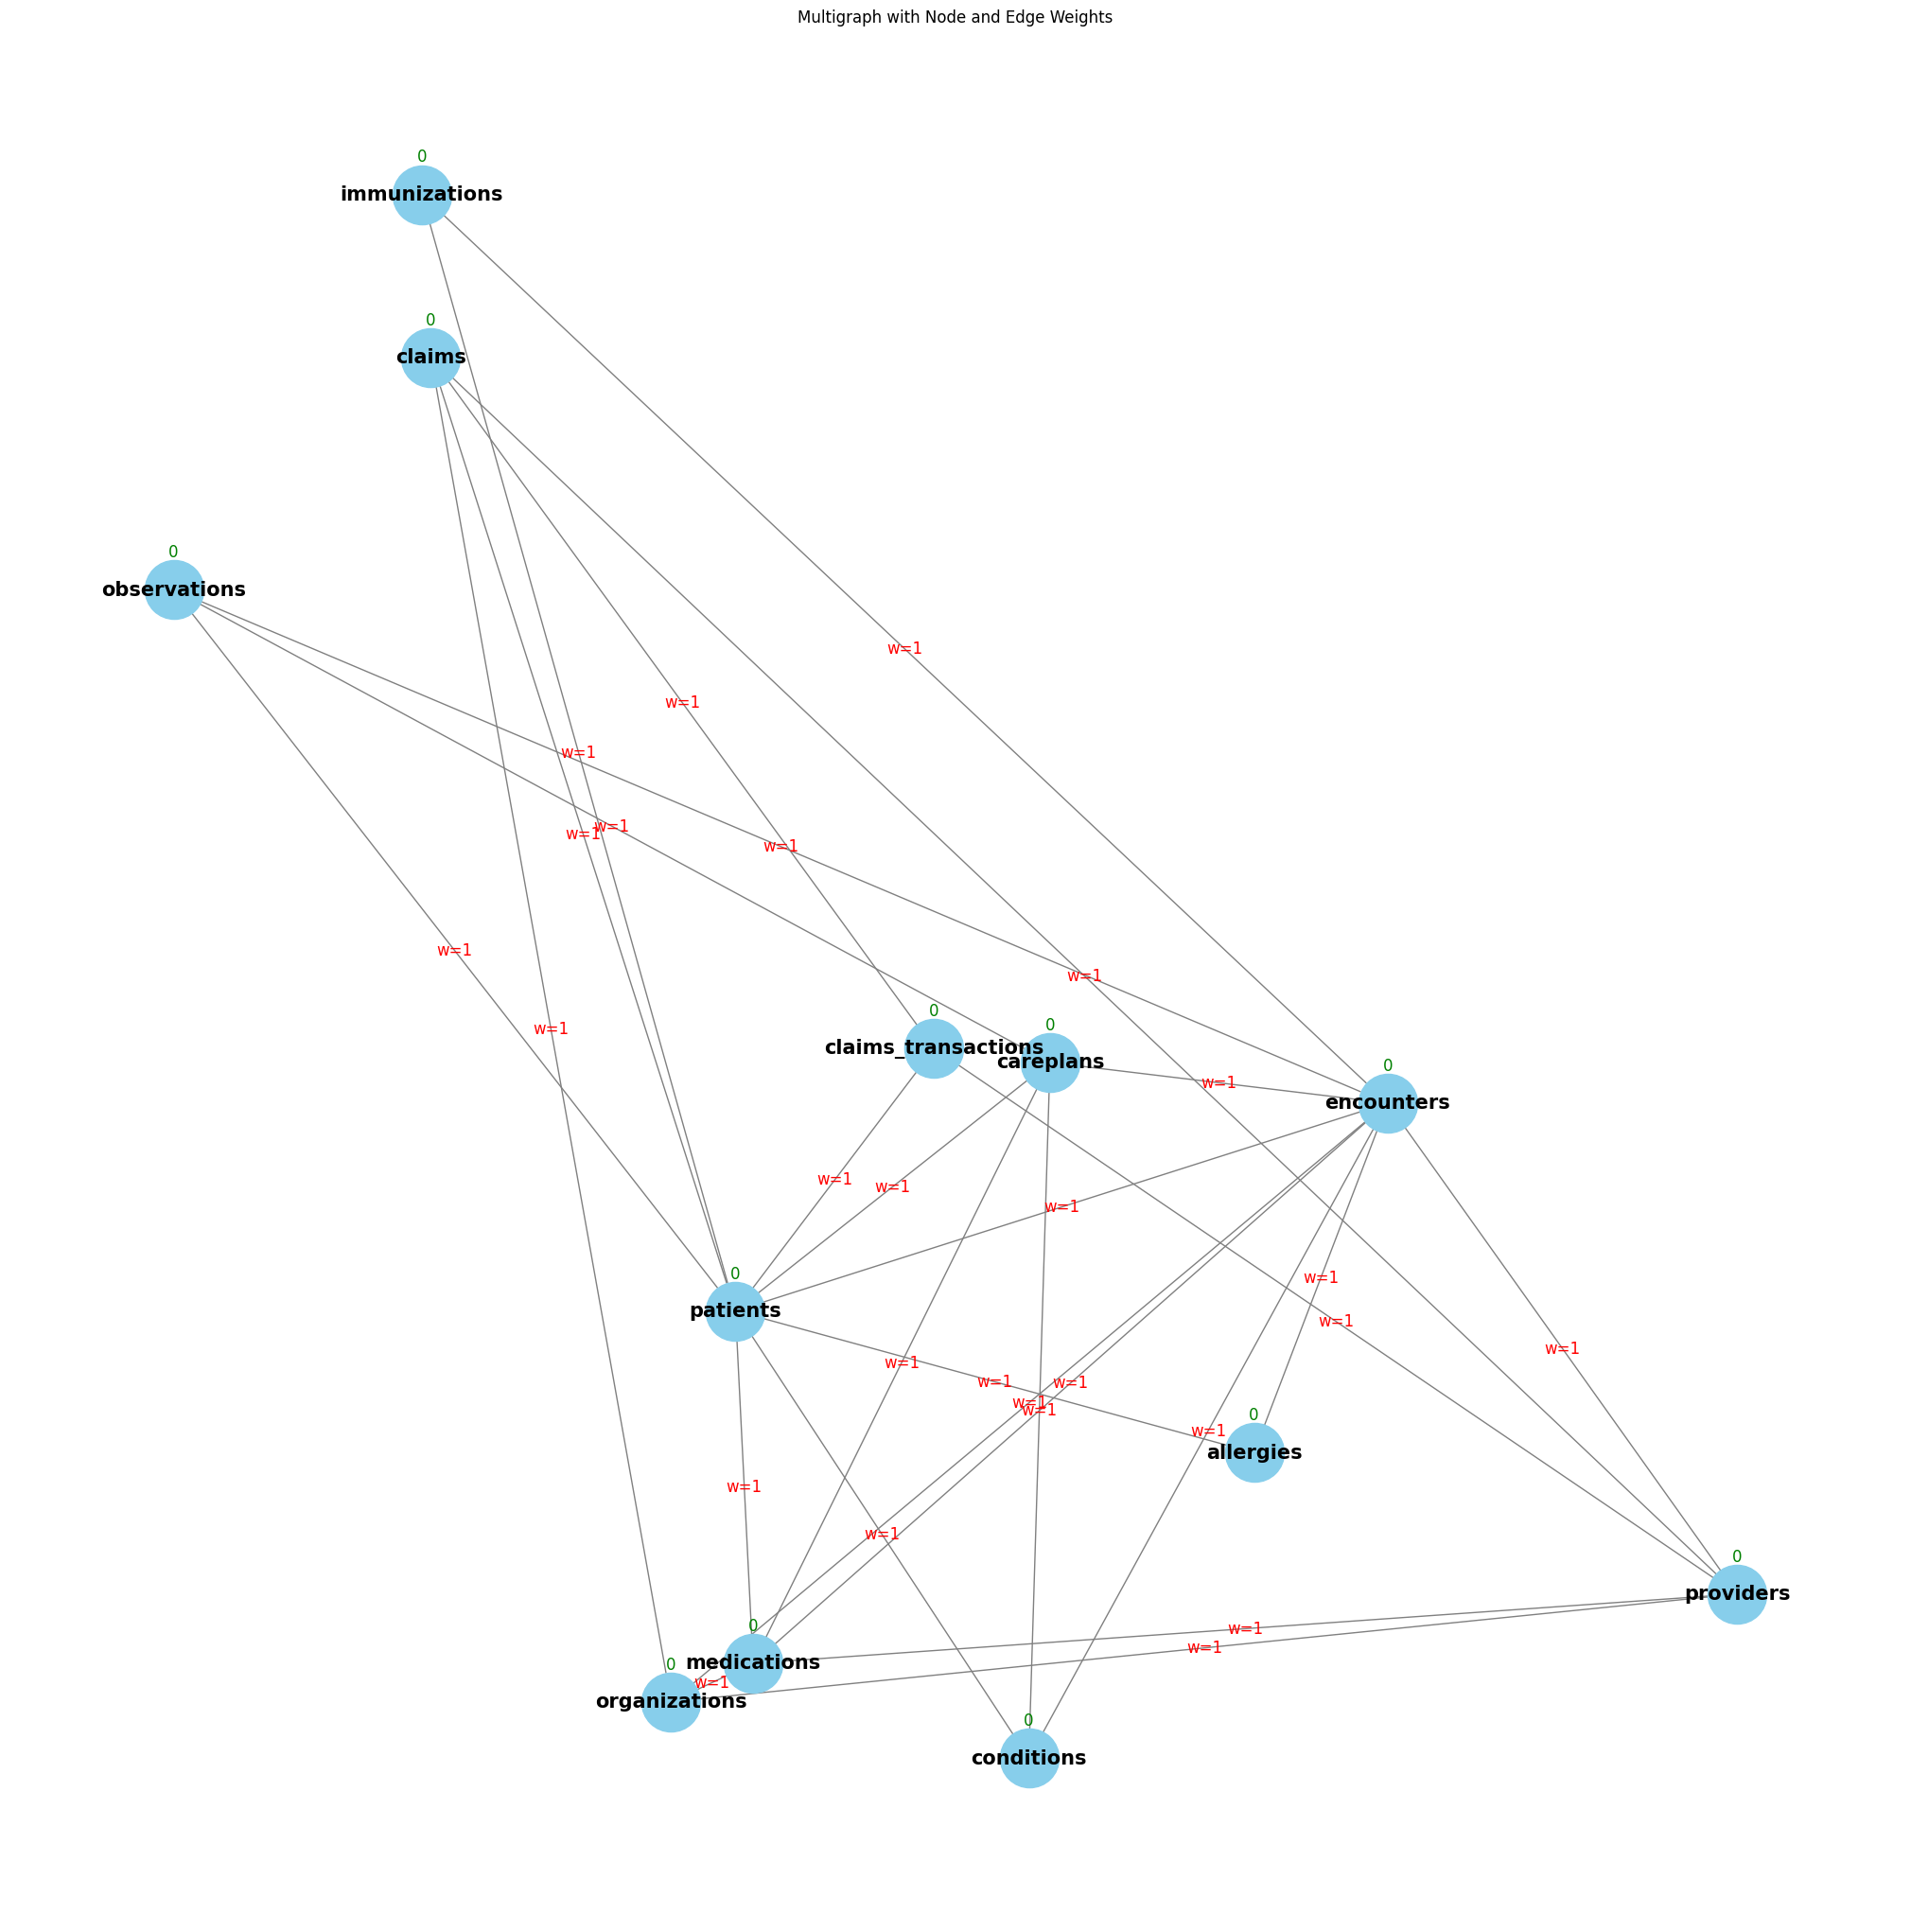

In [3]:
sql_generator.plot_sources_graph()

In [4]:
from data_tools.libs.smart_query_generator.models.models import (
    ETLModel,
    FieldsModel,
    FilterModel,
    SelectionModel,
    SortByModel,
)

etl = ETLModel(
    name="test_etl",
    fields=[
        FieldsModel(id="patients.first", name="first_name"),
        FieldsModel(id="patients.last", name="last_name"),
        FieldsModel(id="allergies.start", name="start_date"),
        FieldsModel(id="encounters.total_claim_cost", name="claim_cost", category="measure", measure_func="sum"),
    ],
    filter=FilterModel(
        selections=[SelectionModel(id="claims.departmentid", values=["3", "20"])],
        sort_by=[SortByModel(id="encounters.start", direction="desc")],
    ),
)


In [6]:
query = sql_generator.generate_query(etl)

In [8]:
query

"SELECT patients.first as `first_name`, patients.last as `last_name`, allergies.start as `start_date`, sum(encounters.total_claim_cost) as `claim_cost` FROM `claims` LEFT JOIN `patients` ON claims.patientid = patients.id LEFT JOIN `encounters` ON encounters.patient = patients.id LEFT JOIN `allergies` ON encounters.id = allergies.encounter WHERE (claims.departmentid IN '['3', '20']') GROUP BY patients.first , patients.last , allergies.start ORDER BY `encounters`.`start` DESC"